In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

mpl.rcParams['figure.dpi']= 150

In [2]:
theta = 1
x = 1
z_min = -1
z_max = 50
z = np.linspace(z_min, z_max, 10000)
# p_\theta(z)
prior = theta * np.exp(-theta * z)
prior[z <= 0] = 0
# p(x|z)
likelihood = np.exp(-0.5 * (x - z)**2) / np.sqrt(2 * np.pi)
# p_\theta(x, z)
unnorm_posterior = prior * likelihood
# p_\theta(z|x)
posterior = unnorm_posterior / unnorm_posterior.mean() / (z_max - z_min)

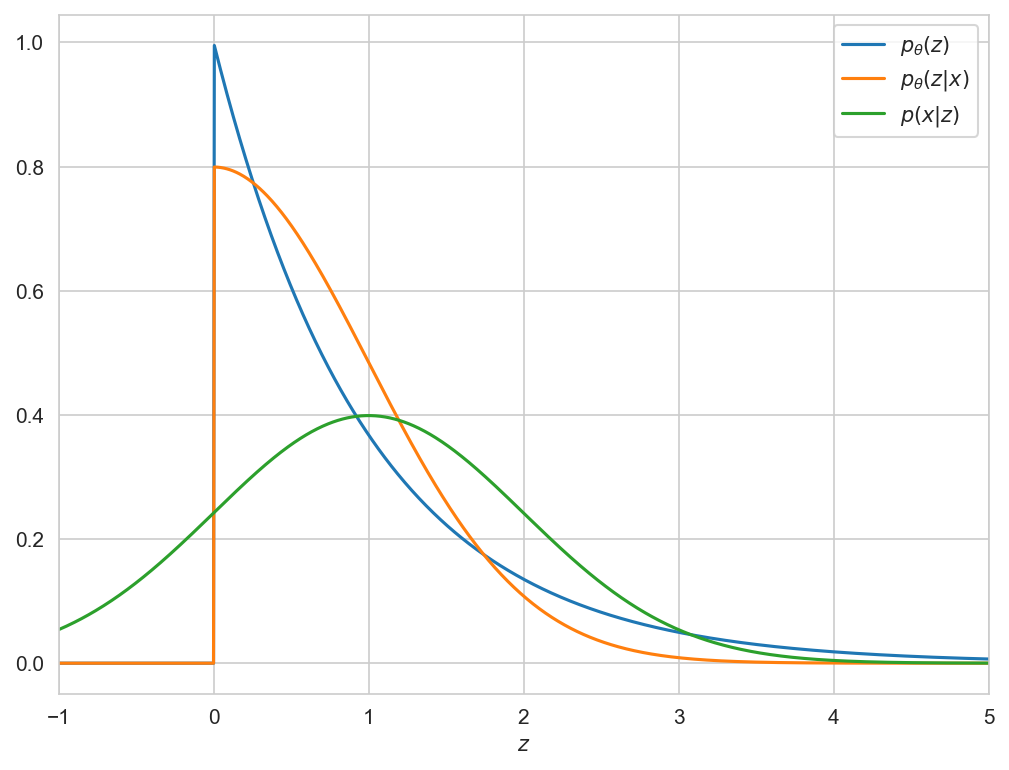

In [3]:
plt.figure(figsize=[8, 6])
plt.plot(z, prior, label='$p_{\\theta}(z)$')
plt.plot(z, posterior, label='$p_\\theta(z|x)$')
plt.plot(z, likelihood, label='$p(x|z)$')
# plt.plot(z, unnorm_posterior, label='$p_\\theta(x, z)$')

plt.legend()
plt.xlim(-1, 5)
plt.xlabel('$z$')
plt.show()

In [5]:
def get_q(phi):
    variational = phi * np.exp(-phi * z)
    variational[z <= 0] = 0
    return variational

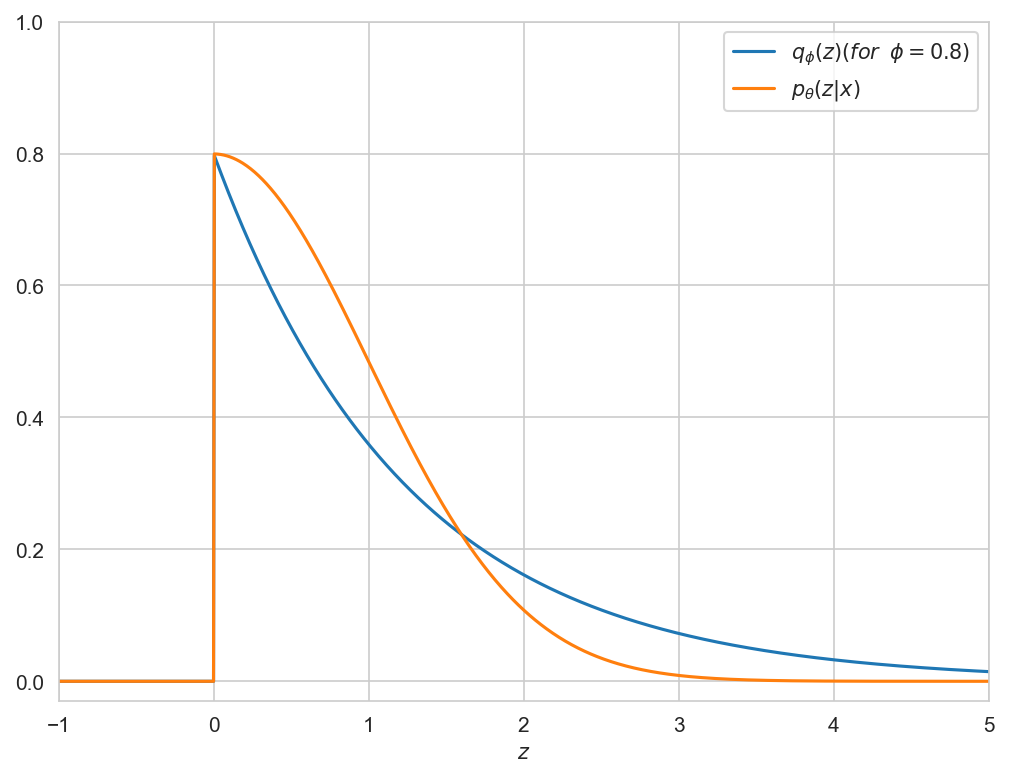

In [6]:
plt.figure(figsize=[8, 6])
phi = 0.8
plt.plot(z, get_q(phi), label='$q_{\\phi}(z)' + f'(for \;\; \phi={phi})$')
plt.plot(z, posterior, label='$p_{\\theta}(z|x)$')

plt.legend()
plt.ylim(-0.03, 1.0)
plt.xlim(-1, 5)
plt.xlabel('$z$')
plt.show()

What does the ELBO look like?

In [7]:
x = 1
def elbo(theta, phi):
  return -1 / phi**2 + (x - theta) / phi + np.log(theta) - np.log(phi)

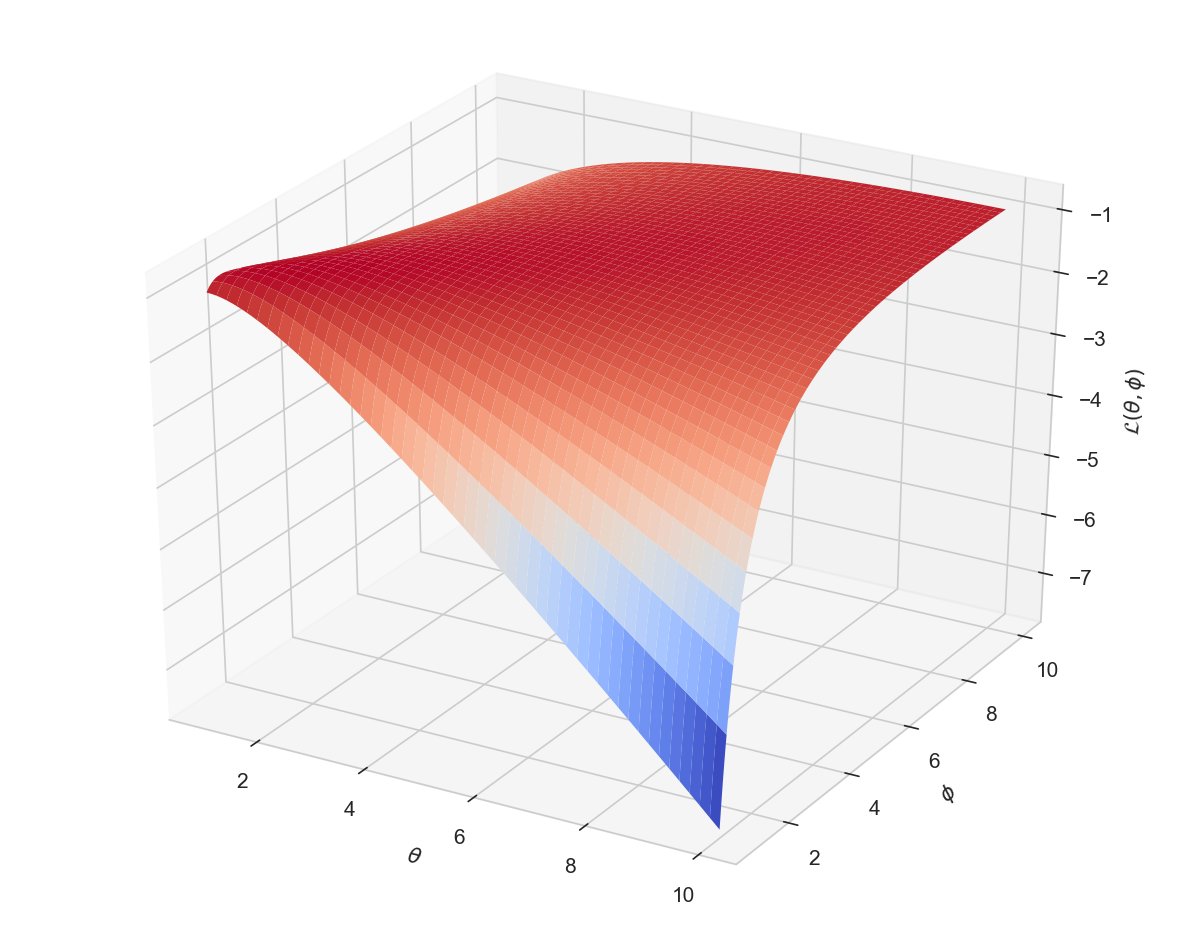

In [8]:
# Lispace should actually start from 0, but ELBO is very low there so the plot looks ugly
theta = np.linspace(1, 10, 1000)
phi = np.linspace(1, 10, 1000)
theta, phi = np.meshgrid(theta, phi)
L = elbo(theta, phi)

fig = plt.figure(figsize=[10, 8])
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta, phi, L, cmap=mpl.cm.coolwarm, linewidth=0, antialiased=True)
# ax.set_zlim(-10, 0)
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\\phi$')
ax.set_zlabel('$\\mathcal{L}(\\theta, \\phi)$')
plt.show()

Text(0, 0.5, '$\\phi$')

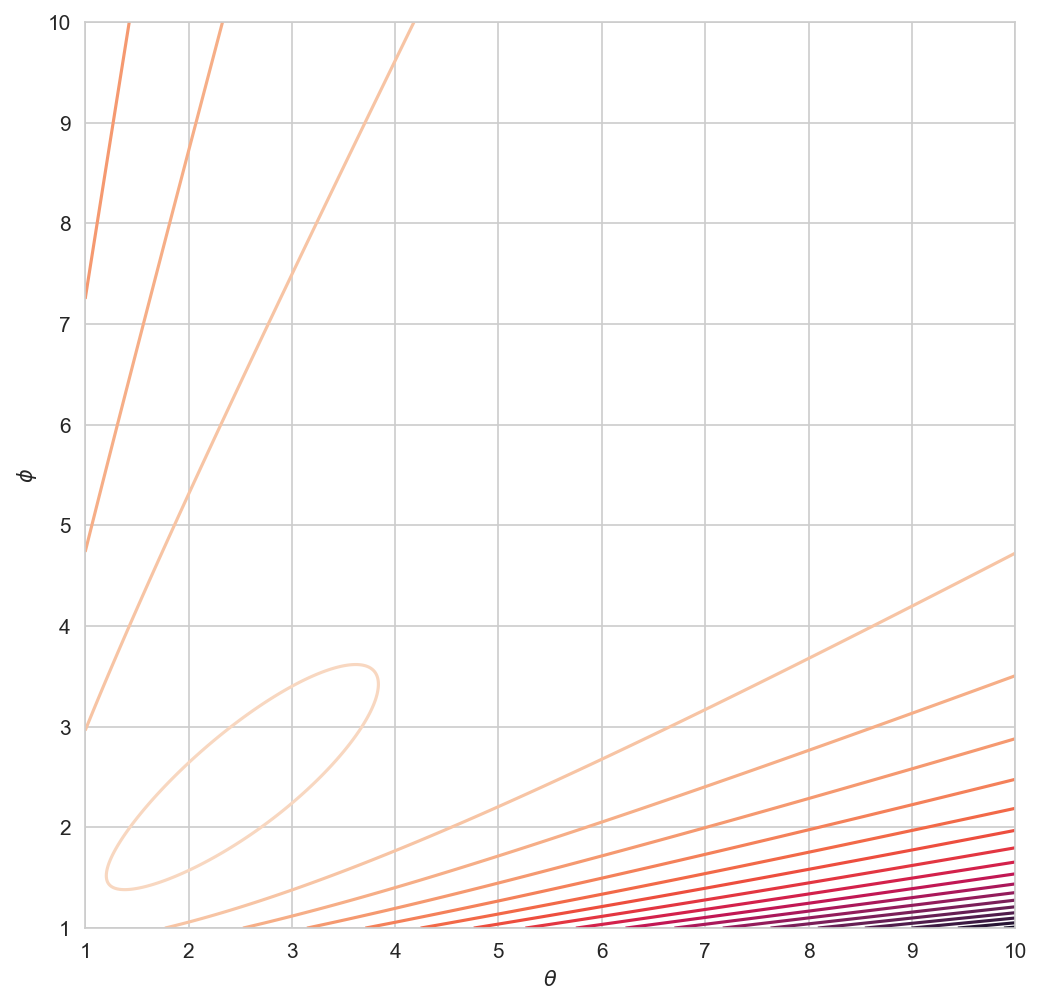

In [9]:
fig = plt.figure(figsize=[8, 8])

plt.contour(theta, phi, L, levels=20)
plt.xlabel('$\\theta$')
plt.ylabel('$\\phi$')